<a href="https://colab.research.google.com/github/AVELURI12/Secure-Phishing-ML-API/blob/main/ML_Model_Access_Control_Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving phishing+websites.zip to phishing+websites.zip


In [2]:
# Unzip file
import zipfile
import os


zip_path = "phishing+websites.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")


os.listdir("dataset")


['Training Dataset.arff', 'Phishing Websites Features.docx', '.old.arff']

In [3]:
# install arff reader
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=ac06a743fbfbc73afec696636a4a5668b3e529f2718dd89a8c93f68cd6671e3b
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [12]:
# Load file
import arff
import pandas as pd

arff_file = "dataset/Training Dataset.arff"

# Load ARFF
with open(arff_file) as f:
    dataset = arff.load(f)

# Convert to pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# 1 = Legitimate, 0 = Suspicious, -1 = Phishy
df.head()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [13]:
# Convert values to int
df = df.astype(int)

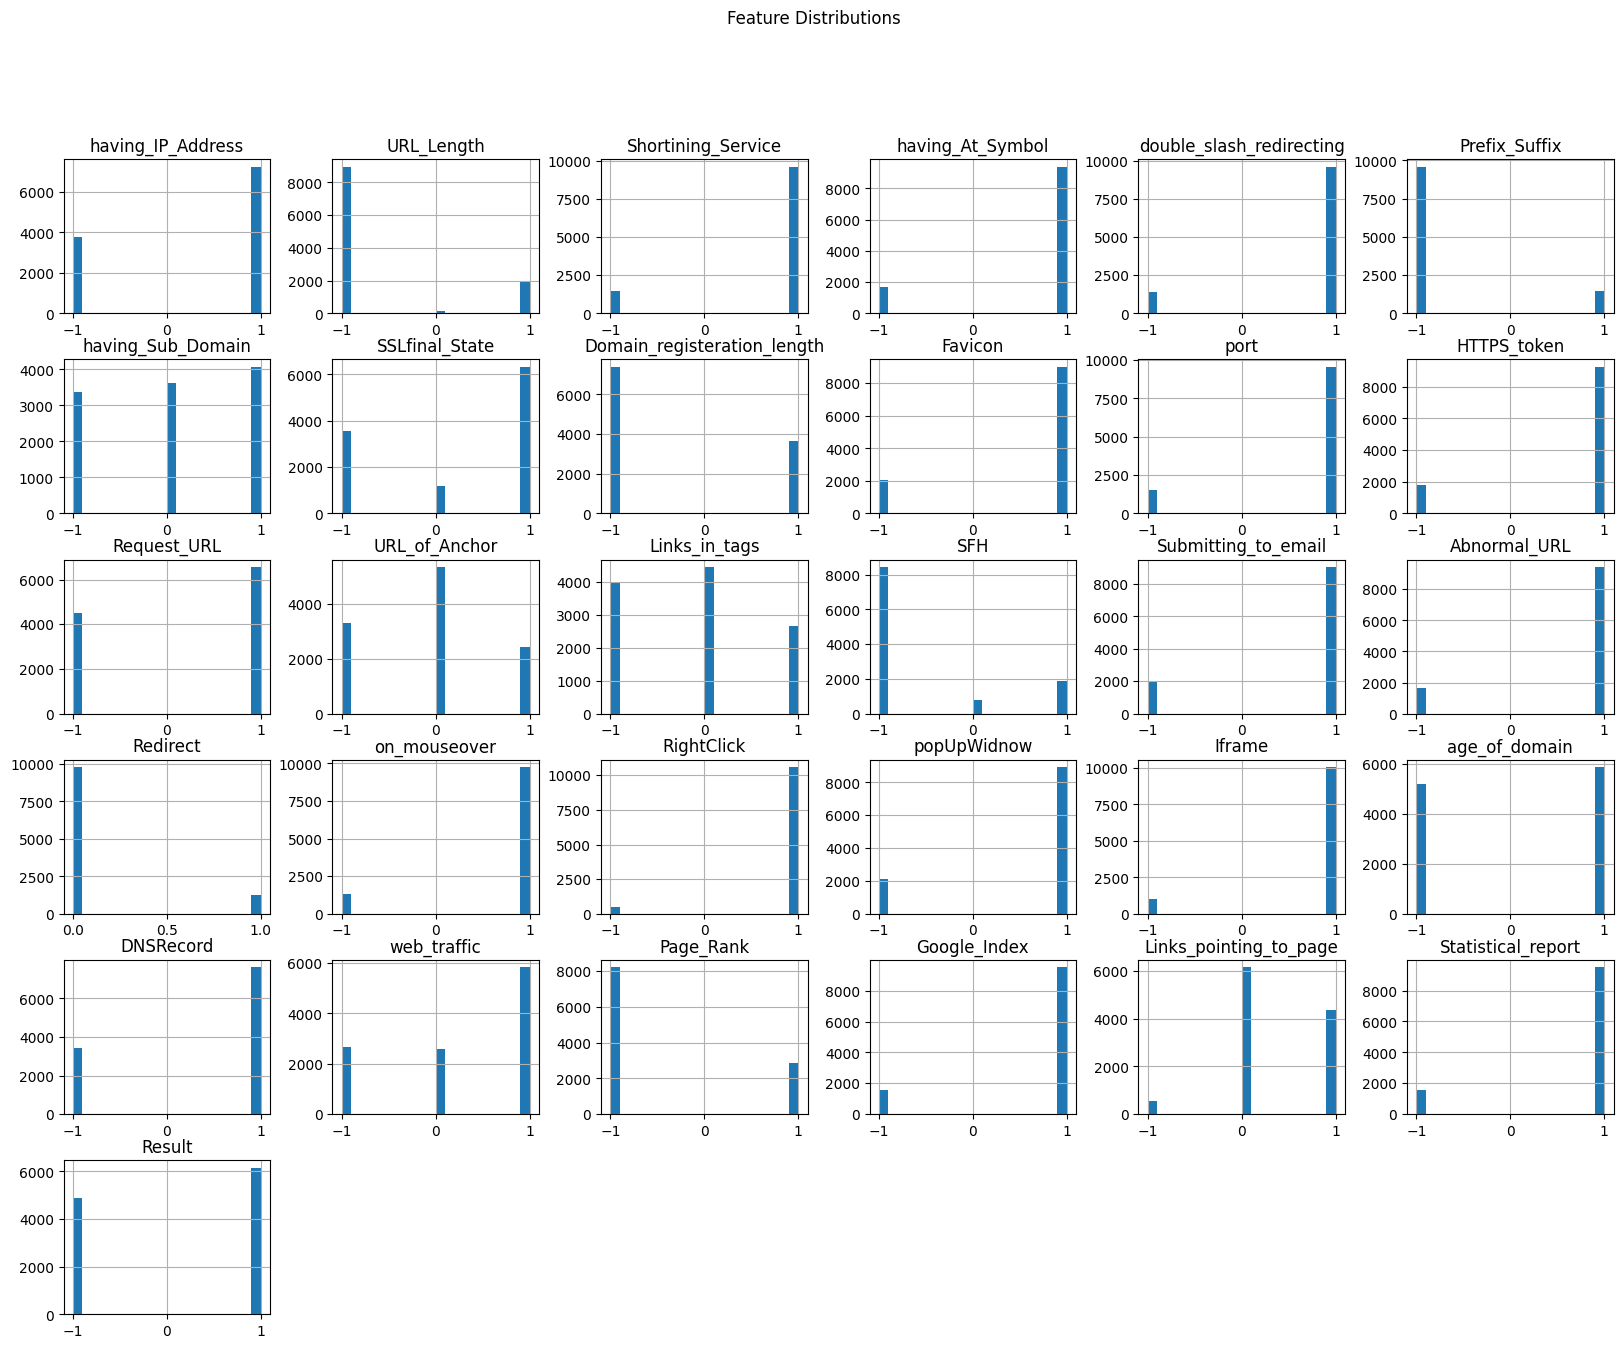

In [14]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 15), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

In [30]:
# Change values to 0,1,2 for target column - 'Results'(Keras starts from 0)
df['Result'] = df['Result'].replace({1:0, 0:1, -1:2})

X = df.drop("Result", axis=1).values
y = df["Result"].values

In [31]:
# Split data into validation, testing, and training sets

from sklearn.model_selection import train_test_split

# Split 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temp into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [33]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy


# Define model
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(units = 2, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    )


In [34]:
# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5424 - loss: 0.9554 - val_accuracy: 0.6303 - val_loss: 0.7456
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6660 - loss: 0.7022 - val_accuracy: 0.7376 - val_loss: 0.6101
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7723 - loss: 0.5470 - val_accuracy: 0.8534 - val_loss: 0.3660
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3280 - val_accuracy: 0.8957 - val_loss: 0.2635
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.2365 - val_accuracy: 0.9089 - val_loss: 0.2299
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9150 - loss: 0.2226 - val_accuracy: 0.9119 - val_loss: 0.2168
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9197 - loss: 0.2069 - val_accuracy: 0.9186 - val_loss: 0.2080
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9210 - loss: 0.2021 - val_accu

In [35]:
# Test model
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9256 - loss: 0.1908
Test Accuracy: 0.9342977404594421
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[881  43]
 [ 66 669]]
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       924
           2       0.94      0.91      0.92       735

    accuracy                           0.93      1659
   macro avg       0.93      0.93      0.93      1659
weighted avg       0.93      0.93      0.93      1659



In [36]:
from tensorflow.keras.models import load_model

model.save("phishing_model.keras")
model = tf.keras.models.load_model("phishing_model.keras")

In [41]:
import numpy as np

input = np.array([[1, 0, -1, 0, 1, 0, 1, 0, 1, -1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]])


# Get probabilities
pred_prob = model.predict(input)
print(pred_prob)

# Get predicted class (0, 1, or 2)
pred_class = pred_prob.argmax(axis=1)[0]
class_mapping = {0: "Legitimate", 1: "Suspicious", 2: "Phishy"}
print("Predicted label:", class_mapping[pred_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[7.9857336e-11 9.9942291e-01 5.7714153e-04]]
Predicted label: Suspicious
